In [5]:
import pandas as pd
from google.colab import drive 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

drive.mount('/content/gdrive')

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/NLP/Week13/week13_train.csv')
# df = pd.read_csv("./airline_review_training_data.csv")
print("Shape:",df.shape)
train_data=df[['document','label']]
train_data.head()

Shape: (45000, 3)


,document,label
0,Stephen Sondheim's SWEENEY TODD: THE DEMON BAR...,positive
1,The only good thing about this movie is that I...,negative
2,I'm afraid this one is pretty dreadful despite...,negative
3,The acting was terrible the cheesy fake CHEAP ...,negative
4,The DVD was a joke the audio for the first few...,negative


# Cleaning the data set

In [7]:
# Cleaning Training Data set
lem = WordNetLemmatizer()

import re
train_data_clean = (
    # start with training data
    train_data

    .assign(clean_document= lambda x:[text.lower() for text in x.document])

     .assign(clean_document= lambda x: [re.sub(r"<br/>","",doc) for doc in x.document])
    #Remove “n\”
    .assign(clean_document= lambda x: [re.sub(r"\n","",doc) for doc in x.clean_document] )
    #Remove mentions i.e. any alphanumeric starting with “@”
    .assign(clean_document= lambda x: [re.sub("/*","",text) for text in x.clean_document])
    # remove punctuation
    .assign(clean_document= lambda x: [re.sub("[^\w\s]","",text) for text in x.clean_document])
    # tokenize
    .assign(word_token= lambda x: [nltk.word_tokenize(text) for text in x.clean_document] )
    # # remove stop words
    .assign(word_token= lambda x: [list(set(list_of_words).difference(stop_words)) for list_of_words in x.word_token])
    # Lemmatising the words
    .assign(word_token= lambda x: [[lem.lemmatize(a_word) for a_word in list_of_words] for list_of_words in x.word_token ])
    # 
    .assign(document_to_sklearn= lambda x: [" ".join(map(str,list_of_words)) for list_of_words in x.word_token ])  
)

train_data_clean.head(20)

,document,label,clean_document,word_token,document_to_sklearn
0,Stephen Sondheim's SWEENEY TODD: THE DEMON BAR...,positive,Stephen Sondheims SWEENEY TODD THE DEMON BARBE...,"[feed, castbr, ended, George, theatre, knockou...",feed castbr ended George theatre knockout Patt...
1,The only good thing about this movie is that I...,negative,The only good thing about this movie is that I...,"[waste, kick, world, deployed, human, as, Rest...",waste kick world deployed human as Rest commen...
2,I'm afraid this one is pretty dreadful despite...,negative,Im afraid this one is pretty dreadful despite ...,"[consistent, untalented, performance, need, li...",consistent untalented performance need little ...
3,The acting was terrible the cheesy fake CHEAP ...,negative,The acting was terrible the cheesy fake CHEAP ...,"[making, absolutely, concept, laugh, line, nee...",making absolutely concept laugh line need fake...
4,The DVD was a joke the audio for the first few...,negative,The DVD was a joke the audio for the first few...,"[20, film, actor, involved, better, job, Segal...",20 film actor involved better job Segal poor b...
5,I gave Soul Plane the benefit of the doubt and...,negative,I gave Soul Plane the benefit of the doubt and...,"[appreciate, howling, Plane, mean, As, black, ...",appreciate howling Plane mean As black falling...
6,A powerfully wonderful movie.. You are held in...,positive,A powerfully wonderful movie You are held in a...,"[Saffron, Smith, dentist, play, powerfully, ge...",Saffron Smith dentist play powerfully getting ...
7,Pretty disappointing prequel to the first two ...,negative,Pretty disappointing prequel to the first two ...,"[prequel, second, simply, film, hilarity, acti...",prequel second simply film hilarity acting cra...
8,The funniest show ever on TV albeit the humor ...,positive,The funniest show ever on TV albeit the humor ...,"[Squad, As, fresh, managed, later, cop, Two, t...",Squad As fresh managed later cop Two textile p...
9,Surprisingly enough does movie does have some ...,negative,Surprisingly enough does movie does have some ...,"[stuff, enough, getting, low, Surprisingly, pr...",stuff enough getting low Surprisingly progress...


# Exploratory Data Analysis

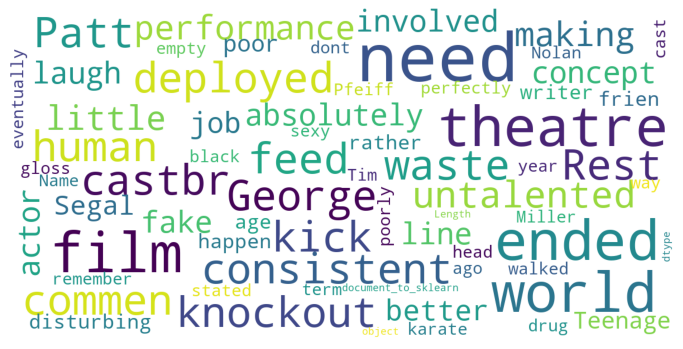

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=7000,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train_data_clean['document_to_sklearn'])

In [9]:
train_data_clean["label"].value_counts()

positive    22500
negative    22500
Name: label, dtype: int64

Text(0.5, 1.0, 'Sentiment Distributions)')

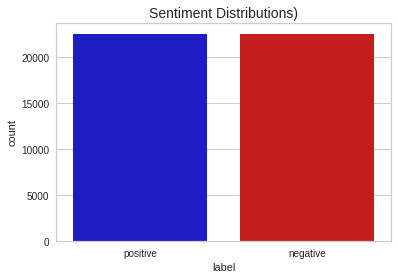

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#0101DF", "#DF0101"]
sns.countplot('label', data=train_data_clean, palette=colors)
plt.title('Sentiment Distributions)', fontsize=14)

# Feature Engineering


In [11]:
train_data_clean['label'] = train_data_clean['label'].apply(lambda x: 1 if x == "positive" else "0")
train_data_clean.head()

,document,label,clean_document,word_token,document_to_sklearn
0,Stephen Sondheim's SWEENEY TODD: THE DEMON BAR...,1,Stephen Sondheims SWEENEY TODD THE DEMON BARBE...,"[feed, castbr, ended, George, theatre, knockou...",feed castbr ended George theatre knockout Patt...
1,The only good thing about this movie is that I...,0,The only good thing about this movie is that I...,"[waste, kick, world, deployed, human, as, Rest...",waste kick world deployed human as Rest commen...
2,I'm afraid this one is pretty dreadful despite...,0,Im afraid this one is pretty dreadful despite ...,"[consistent, untalented, performance, need, li...",consistent untalented performance need little ...
3,The acting was terrible the cheesy fake CHEAP ...,0,The acting was terrible the cheesy fake CHEAP ...,"[making, absolutely, concept, laugh, line, nee...",making absolutely concept laugh line need fake...
4,The DVD was a joke the audio for the first few...,0,The DVD was a joke the audio for the first few...,"[20, film, actor, involved, better, job, Segal...",20 film actor involved better job Segal poor b...


In [12]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 500)
X = vectorizer.fit_transform([i for i in train_data_clean['document_to_sklearn']])
# Use the same vectorizer to extract the features from test data(later) as well
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df_bow_sklearn['label'] = train_data_clean['label']
df_bow_sklearn

,10,able,absolutely,act,acting,action,actor,actress,actually,add,after,age,all,almost,along,already,also,although,always,amazing,american,and,another,anyone,anything,anyway,around,art,as,at,attempt,audience,away,awful,back,bad,based,beautiful,become,becomes,begin,beginning,behind,believe,best,better,big,bit,black,body,book,boring,boy,br,brilliant,brother,budget,but,call,called,came,camera,cant,car,care,case,cast,certainly,chance,change,character,child,cinema,city,classic,close,come,comedy,coming,comment,complete,completely,could,couldnt,couple,course,credit,cut,dark,daughter,day,dead,deal,death,decent,definitely,despite,dialogue,didnt,different,directed,direction,director,doesnt,done,dont,drama,dvd,early,effect,effort,either,element,else,end,ending,enjoy,enjoyed,enough,entertaining,entire,episode,especially,even,event,ever,every,everyone,everything,evil,example,excellent,except,expect,experience,extremely,eye,face,fact,fall,family,fan,far,father,favorite,feature,feel,feeling,felt,fight,film,final,finally,find,fine,first,flick,for,found,friend,full,fun,funny,game,gave,genre,get,getting,girl,give,given,go,going,good,got,great,group,guess,guy,half,hand,happens,hard,he,head,heard,heart,hell,help,hero,high,highly,his,history,hit,hollywood,home,hope,horrible,horror,hour,house,how,however,human,humor,id,idea,if,ill,im,in,including,instead,interest,interesting,involved,isnt,it,itbr,its,ive,job,john,joke,just,keep,kid,kill,killed,killer,kind,know,lack,last,late,later,laugh,le,lead,least,leave,left,let,level,life,like,liked,line,little,...,living,long,look,looked,looking,lost,lot,love,loved,low,made,main,make,making,man,many,matter,may,maybe,mean,meet,men,might,mind,minute,moment,money,mother,move,movie,mr,much,murder,music,must,my,name,need,never,new,next,nice,night,no,not,nothing,now,number,obvious,obviously,of,often,oh,old,on,one,order,original,others,overall,part,particularly,past,people,perfect,performance,perhaps,person,picture,piece,place,play,played,playing,plot,point,poor,pretty,probably,problem,production,put,quality,question,quite,rather,read,real,really,reason,recommend,relationship,remember,rest,review,right,role,run,said,save,saw,say,scene,school,score,screen,script,second,see,seeing,seem,seemed,seems,seen,sense,sequence,series,set,several,sex,she,shes,short,shot,show,side,simply,since,situation,small,so,some,someone,something,sometimes,son,song,soon,sort,sound,special,stand,star,start,still,stop,story,stuff,stupid,style,supposed,sure,take,taken,talent,talk,tell,terrible,that,thats,the,theme,then,there,theres,they,theyre,thing,think,thinking,this,though,thought,three,throughout,time,title,to,today,together,told,took,top,totally,town,true,truly,try,trying,turn,tv,two,type,understand,unfortunately,us,use,used,version,video,view,viewer,voice,want,wanted,war,wasnt,waste,watch,watched,watching,way,we,well,went,what,when,while,white,who,whole,why,wife,wish,with,without,woman,wonder,wonderful,wont,word,work,world,worse,worst,worth,would,wouldnt,writer,writing,written,wrong,year,yes,yet,you,youll,young,youre,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,2,0,0,0,0,1,2,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,

# Modeling

In [85]:
!pip install pycaret

     |████████████████████████████████| 320 kB 6.9 MB/s 
     |████████████████████████████████| 1.7 MB 63.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 116 kB 53.2 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 6.8 MB 28.3 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 167 kB 50.9 MB/s 
     |████████████████████████████████| 261 kB 58.9 MB/s 
     |████████████████████████████████| 2.0 MB 47.8 MB/s 
     |████████████████████████████████| 1.3 MB 19.9 MB/s 
     |████████████████████████████████| 16.8 MB 22.9 MB/s 
     |████████████████████████████████| 303 kB 68.1 MB/s 
     |████████████████████████████████| 3.1 MB 47.7 MB/s 
     |████████████████████████████████| 102 kB 13.2 MB/s 
     |█████████████████

In [13]:
from pycaret.classification import *

In [14]:
s = setup(data = df_bow_sklearn, target='label',
          numeric_features=vectorizer.get_feature_names(),
          session_id=123,verbose=False,silent=True)

In [15]:
com  = compare_models(sort='Accuracy') 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8331,0.9115,0.8465,0.8243,0.8353,0.6663,0.6665,1.473
ridge,Ridge Classifier,0.8322,0.0000,0.8553,0.8174,0.8359,0.6644,0.6651,0.285
lda,Linear Discriminant Analysis,0.8321,0.9102,0.8553,0.8173,0.8359,0.6643,0.6650,4.205
svm,SVM - Linear Kernel,0.8264,0.0000,0.8410,0.8189,0.8287,0.6528,0.6549,1.605
lightgbm,Light Gradient Boosting Machine,0.8218,0.9034,0.8364,0.8125,0.8243,0.6435,0.6439,1.550
et,Extra Trees Classifier,0.8161,0.8942,0.8205,0.8132,0.8168,0.6322,0.6323,17.080
qda,Quadratic Discriminant Analysis,0.8073,0.8859,0.8308,0.7934,0.8116,0.6145,0.6153,2.849
rf,Random Forest Classifier,0.8057,0.8876,0.8119,0.8019,0.8068,0.6114,0.6115,12.241
nb,Naive Bayes,0.8015,0.8789,0.8345,0.7828,0.8078,0.6030,0.6044,0.526
gbc,Gradient Boosting Classifier,0.7947,0.8802,0.8480,0.7662,0.8050,0.5895,0.5929,22.720


From above table we can see that simple logistic regression is performing well than other algorithms so we will be using logistics regression to predict the sentiment on the test data


In [42]:
# Splitting Data into for training
X=df_bow_sklearn.iloc[:,:-1]
y=df_bow_sklearn.iloc[::,-1]
y=y.astype('int')
print("Xshape:",X.shape)
print("YShape:",y.shape)
# y



Xshape: (45000, 500)
YShape: (45000,)


In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)

In [49]:
from sklearn.metrics import accuracy_score, classification_report

y_pred =clf.predict(X)
classification_report_= classification_report(y, y_pred)
print("classification_report_\n",classification_report_)
print('\n Accuracy: ', accuracy_score(y, y_pred))


classification_report_
               precision    recall  f1-score   support

           0       0.85      0.83      0.84     22500
           1       0.83      0.85      0.84     22500

    accuracy                           0.84     45000
   macro avg       0.84      0.84      0.84     45000
weighted avg       0.84      0.84      0.84     45000


 Accuracy:  0.8404222222222222


# Test Data

In [50]:
df_test=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/NLP/Week13/week13_test.csv')

In [51]:
print("Shape:",df_test.shape)
df_test.head()

Shape: (5000, 2)


,document,label
0,This movie has made me upset! When I think of ...,NaN
1,Put simply this mini-series was terrible.. Let...,NaN
2,"This was a ""sleeper"" for sure!! Much better th...",NaN
3,There wasn't a day in 2002 where i wasn't chas...,NaN
4,With an absolutely amazing cast and crew this ...,NaN


In [52]:
# Cleaning Testing Data set
lem = WordNetLemmatizer()

import re
test_data_clean = (
    # start with training data
    df_test

    .assign(clean_document= lambda x:[text.lower() for text in x.document])

     .assign(clean_document= lambda x: [re.sub(r"<br/>","",doc) for doc in x.document])
    #Remove “n\”
    .assign(clean_document= lambda x: [re.sub(r"\n","",doc) for doc in x.clean_document] )
    #Remove mentions i.e. any alphanumeric starting with “@”
    .assign(clean_document= lambda x: [re.sub("/*","",text) for text in x.clean_document])
    # remove punctuation
    .assign(clean_document= lambda x: [re.sub("[^\w\s]","",text) for text in x.clean_document])
    # tokenize
    .assign(word_token= lambda x: [nltk.word_tokenize(text) for text in x.clean_document] )
    # # remove stop words
    .assign(word_token= lambda x: [list(set(list_of_words).difference(stop_words)) for list_of_words in x.word_token])
    # Lemmatising the words
    .assign(word_token= lambda x: [[lem.lemmatize(a_word) for a_word in list_of_words] for list_of_words in x.word_token ])
    # 
    .assign(document_to_sklearn= lambda x: [" ".join(map(str,list_of_words)) for list_of_words in x.word_token ])  
)

test_data_clean.head(20)

,document,label,clean_document,word_token,document_to_sklearn
0,This movie has made me upset! When I think of ...,NaN,This movie has made me upset When I think of C...,"[cat, year, little, find, wouldnt, humor, cude...",cat year little find wouldnt humor cude maybe ...
1,Put simply this mini-series was terrible.. Let...,NaN,Put simply this miniseries was terrible Let me...,"[little, enough, Helen, find, poor, want, intr...",little enough Helen find poor want introduced ...
2,"This was a ""sleeper"" for sure!! Much better th...",NaN,This was a sleeper for sure Much better than I...,"[film, gobbleyouup, run, better, sure, Vin, ot...",film gobbleyouup run better sure Vin otherwise...
3,There wasn't a day in 2002 where i wasn't chas...,NaN,There wasnt a day in 2002 where i wasnt chased...,"[wellbr, stuff, film, homebr, victim, granted,...",wellbr stuff film homebr victim granted Ive br...
4,With an absolutely amazing cast and crew this ...,NaN,With an absolutely amazing cast and crew this ...,"[way, rather, absolutely, enough, 1979, photog...",way rather absolutely enough 1979 photography ...
5,i LOVED IT and was SO shattered that there not...,NaN,i LOVED IT and was SO shattered that there not...,"[making, miss, especially, season, want, maybe...",making miss especially season want maybe writr...
6,1st watched 8/7/2004 - 3 out of 10(Dir-Brett T...,NaN,1st watched 872004 3 out of 10DirBrett Thomps...,"[rack, HannaBarbara, bad, favorite, script, li...",rack HannaBarbara bad favorite script liveacti...
7,Dan Burgess is a nice guy.. He happens to be a...,NaN,Dan Burgess is a nice guy He happens to be a C...,"[making, friend, explains, cant, constantly, b...",making friend explains cant constantly bothere...
8,if i could rate it a zero i would coming from...,NaN,if i could rate it a zero i would coming from...,"[neanderthal, disgusting, execution, usebr, To...",neanderthal disgusting execution usebr Topic d...
9,I recently bought the DVD forgetting just how ...,NaN,I recently bought the DVD forgetting just how ...,"[making, version, hated, recently, A, change, ...",making version hated recently A change relatio...


In [56]:
test_data_clean=test_data_clean.drop(['label'],axis=1)
test_data_clean.head()

,document,clean_document,word_token,document_to_sklearn
0,This movie has made me upset! When I think of ...,This movie has made me upset When I think of C...,"[cat, year, little, find, wouldnt, humor, cude...",cat year little find wouldnt humor cude maybe ...
1,Put simply this mini-series was terrible.. Let...,Put simply this miniseries was terrible Let me...,"[little, enough, Helen, find, poor, want, intr...",little enough Helen find poor want introduced ...
2,"This was a ""sleeper"" for sure!! Much better th...",This was a sleeper for sure Much better than I...,"[film, gobbleyouup, run, better, sure, Vin, ot...",film gobbleyouup run better sure Vin otherwise...
3,There wasn't a day in 2002 where i wasn't chas...,There wasnt a day in 2002 where i wasnt chased...,"[wellbr, stuff, film, homebr, victim, granted,...",wellbr stuff film homebr victim granted Ive br...
4,With an absolutely amazing cast and crew this ...,With an absolutely amazing cast and crew this ...,"[way, rather, absolutely, enough, 1979, photog...",way rather absolutely enough 1979 photography ...


In [57]:
# Use the same vectorizer [fit to learn and transform for test data] for feature Extraction
X_test = vectorizer.transform(test_data_clean['document_to_sklearn'])
df_bow_sklearn_test = pd.DataFrame(X_test.toarray(),columns=vectorizer.get_feature_names())
df_bow_sklearn_test


,10,able,absolutely,act,acting,action,actor,actress,actually,add,...,writing,written,wrong,year,yes,yet,you,youll,young,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4998,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# Predict the sentiment on the test data set
y_pred_test=clf.predict(df_bow_sklearn_test)
y_pred_test

array([0, 0, 1, ..., 0, 0, 1])

In [60]:
# Assign the prediceted label
df_test['label']=y_pred_test

In [61]:
df_test.head()

,document,label
0,This movie has made me upset! When I think of ...,0
1,Put simply this mini-series was terrible.. Let...,0
2,"This was a ""sleeper"" for sure!! Much better th...",1
3,There wasn't a day in 2002 where i wasn't chas...,1
4,With an absolutely amazing cast and crew this ...,1


In [63]:
# Save the file for submission
df_test.to_csv('/content/gdrive/MyDrive/Colab Notebooks/NLP/Week13/test_data_with_label.csv')